In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings 

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

youtube=pd.read_csv("C:/Users/neslihan.kumbasar/bootcamp/youtube_temiz.csv", index_col=0)
youtube.head()

,sira,derece,kanal_adi,video_sayisi,abone_sayisi,goruntulenme_sayisi
0,1st,A++,Zee TV,82757.0,18752952.0,20869786591
1,2nd,A++,T-Series,12661.0,61196304.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238252.0,9793305082
3,4th,A++,SET India,27323.0,31180560.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433


In [3]:
youtube["winsorize_video_sayisi"]=winsorize(youtube["video_sayisi"], (0,0.10))
youtube["winsorize_abone_sayisi"]=winsorize(youtube["abone_sayisi"], (0,0.10))
youtube["winsorize_goruntulenme_sayisi"]=winsorize(youtube["goruntulenme_sayisi"], (0,0.10))

In [4]:
pd.options.display.float_format='{:.3f}'.format
for i in range(0, len(youtube.derece)):
    if pd.isnull(youtube.derece[i]):
        youtube.derece[i]=youtube.derece[i-1]
youtube.describe()        

,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_abone_sayisi,winsorize_goruntulenme_sayisi
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,3859.464,2620004.435,1071449400.150,1288.414,2081597.006,782847594.720
std,17075.610,3771402.411,2003843972.124,1779.181,1781477.579,775430088.742
min,1.000,301.000,75.000,1.000,301.000,75.000
25%,141.000,666802.500,186232945.750,141.000,666802.500,186232945.750
50%,445.000,1544402.000,482054780.000,445.000,1544402.000,482054780.000
75%,1511.500,2723181.500,1124367826.750,1511.500,2723181.500,1124367826.750
max,422326.000,65995310.000,47548839843.000,5653.000,5895361.000,2468241402.000


In [5]:
youtube.describe(include=['O'])

,sira,derece,kanal_adi
count,5000,5000,5000
unique,5000,5,4993
top,"1,841st",B+,Bollywood Classics
freq,1,2960,2


In [6]:
youtube.to_csv("C:/Users/neslihan.kumbasar/bootcamp/youtube_winsorize.csv")

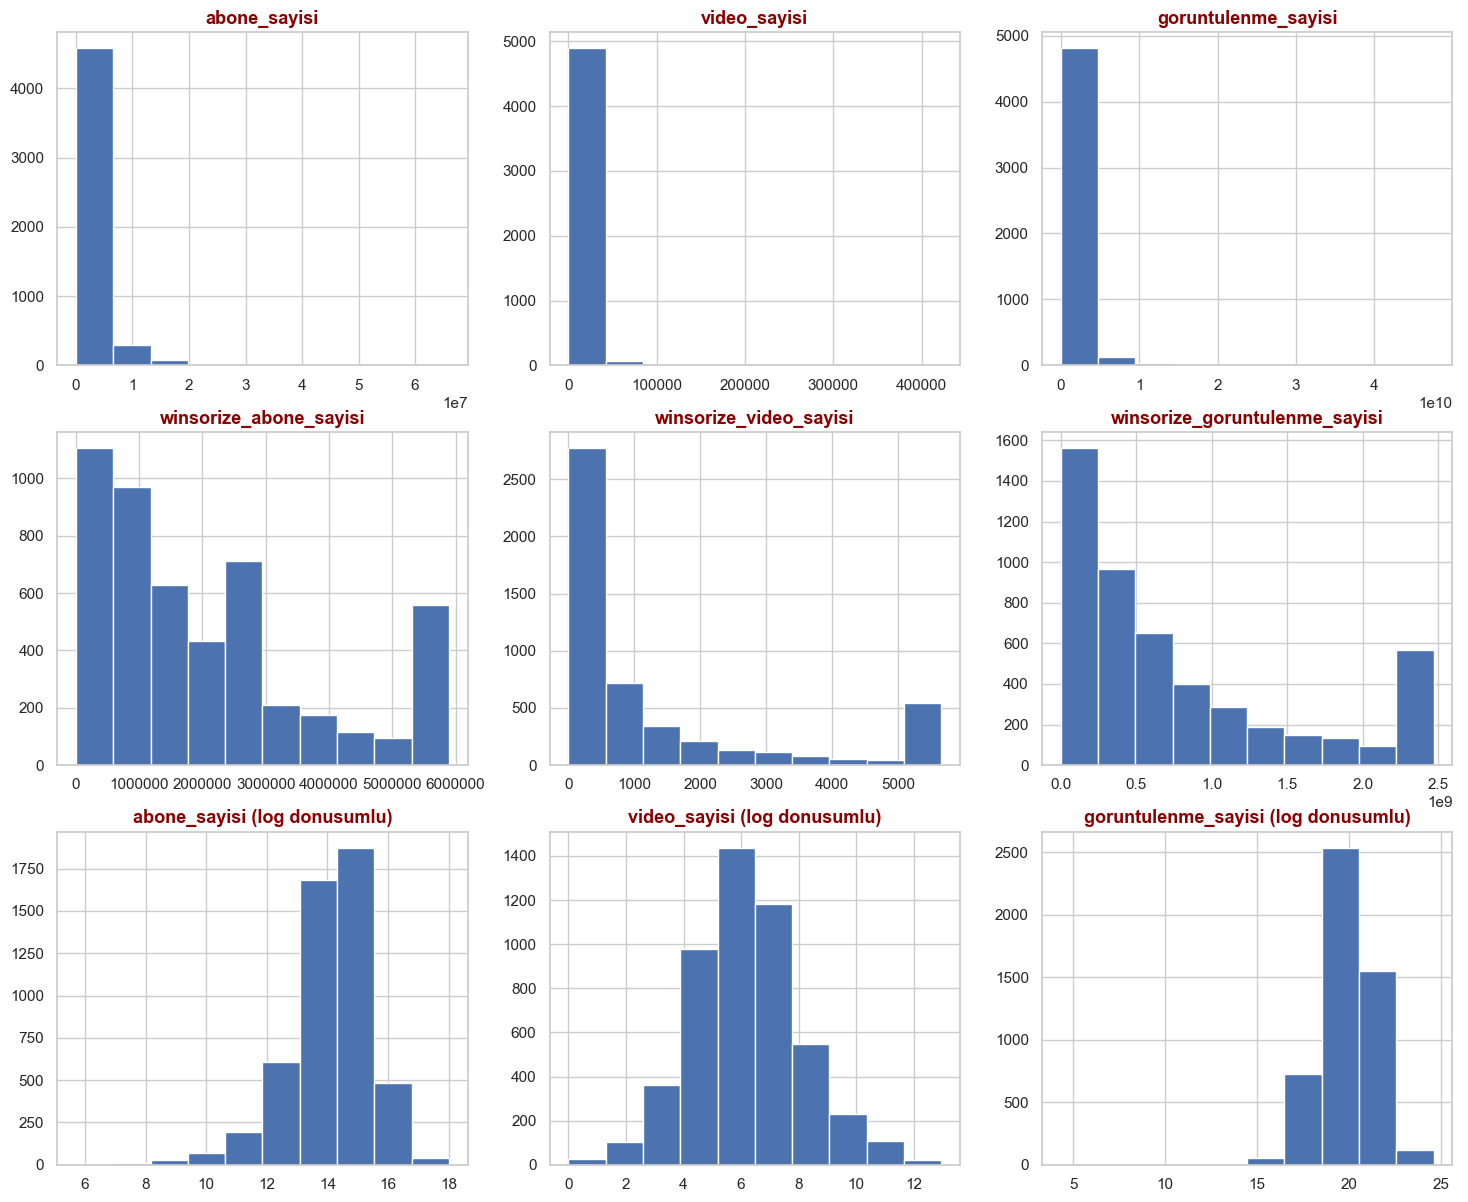

In [7]:
plt.figure(figsize=(18,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler=['abone_sayisi','video_sayisi','goruntulenme_sayisi']
winsorize_degisklenler=['winsorize_abone_sayisi','winsorize_video_sayisi','winsorize_goruntulenme_sayisi']

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.hist(youtube[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3,3,i+4)
    plt.hist(youtube[winsorize_degisklenler[i]])
    plt.title(winsorize_degisklenler[i], fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3,3,i+7)
    plt.hist(np.log(youtube[degiskenler[i]]))
    plt.title(degiskenler[i]+' (log donusumlu)', fontdict=baslik_font)    

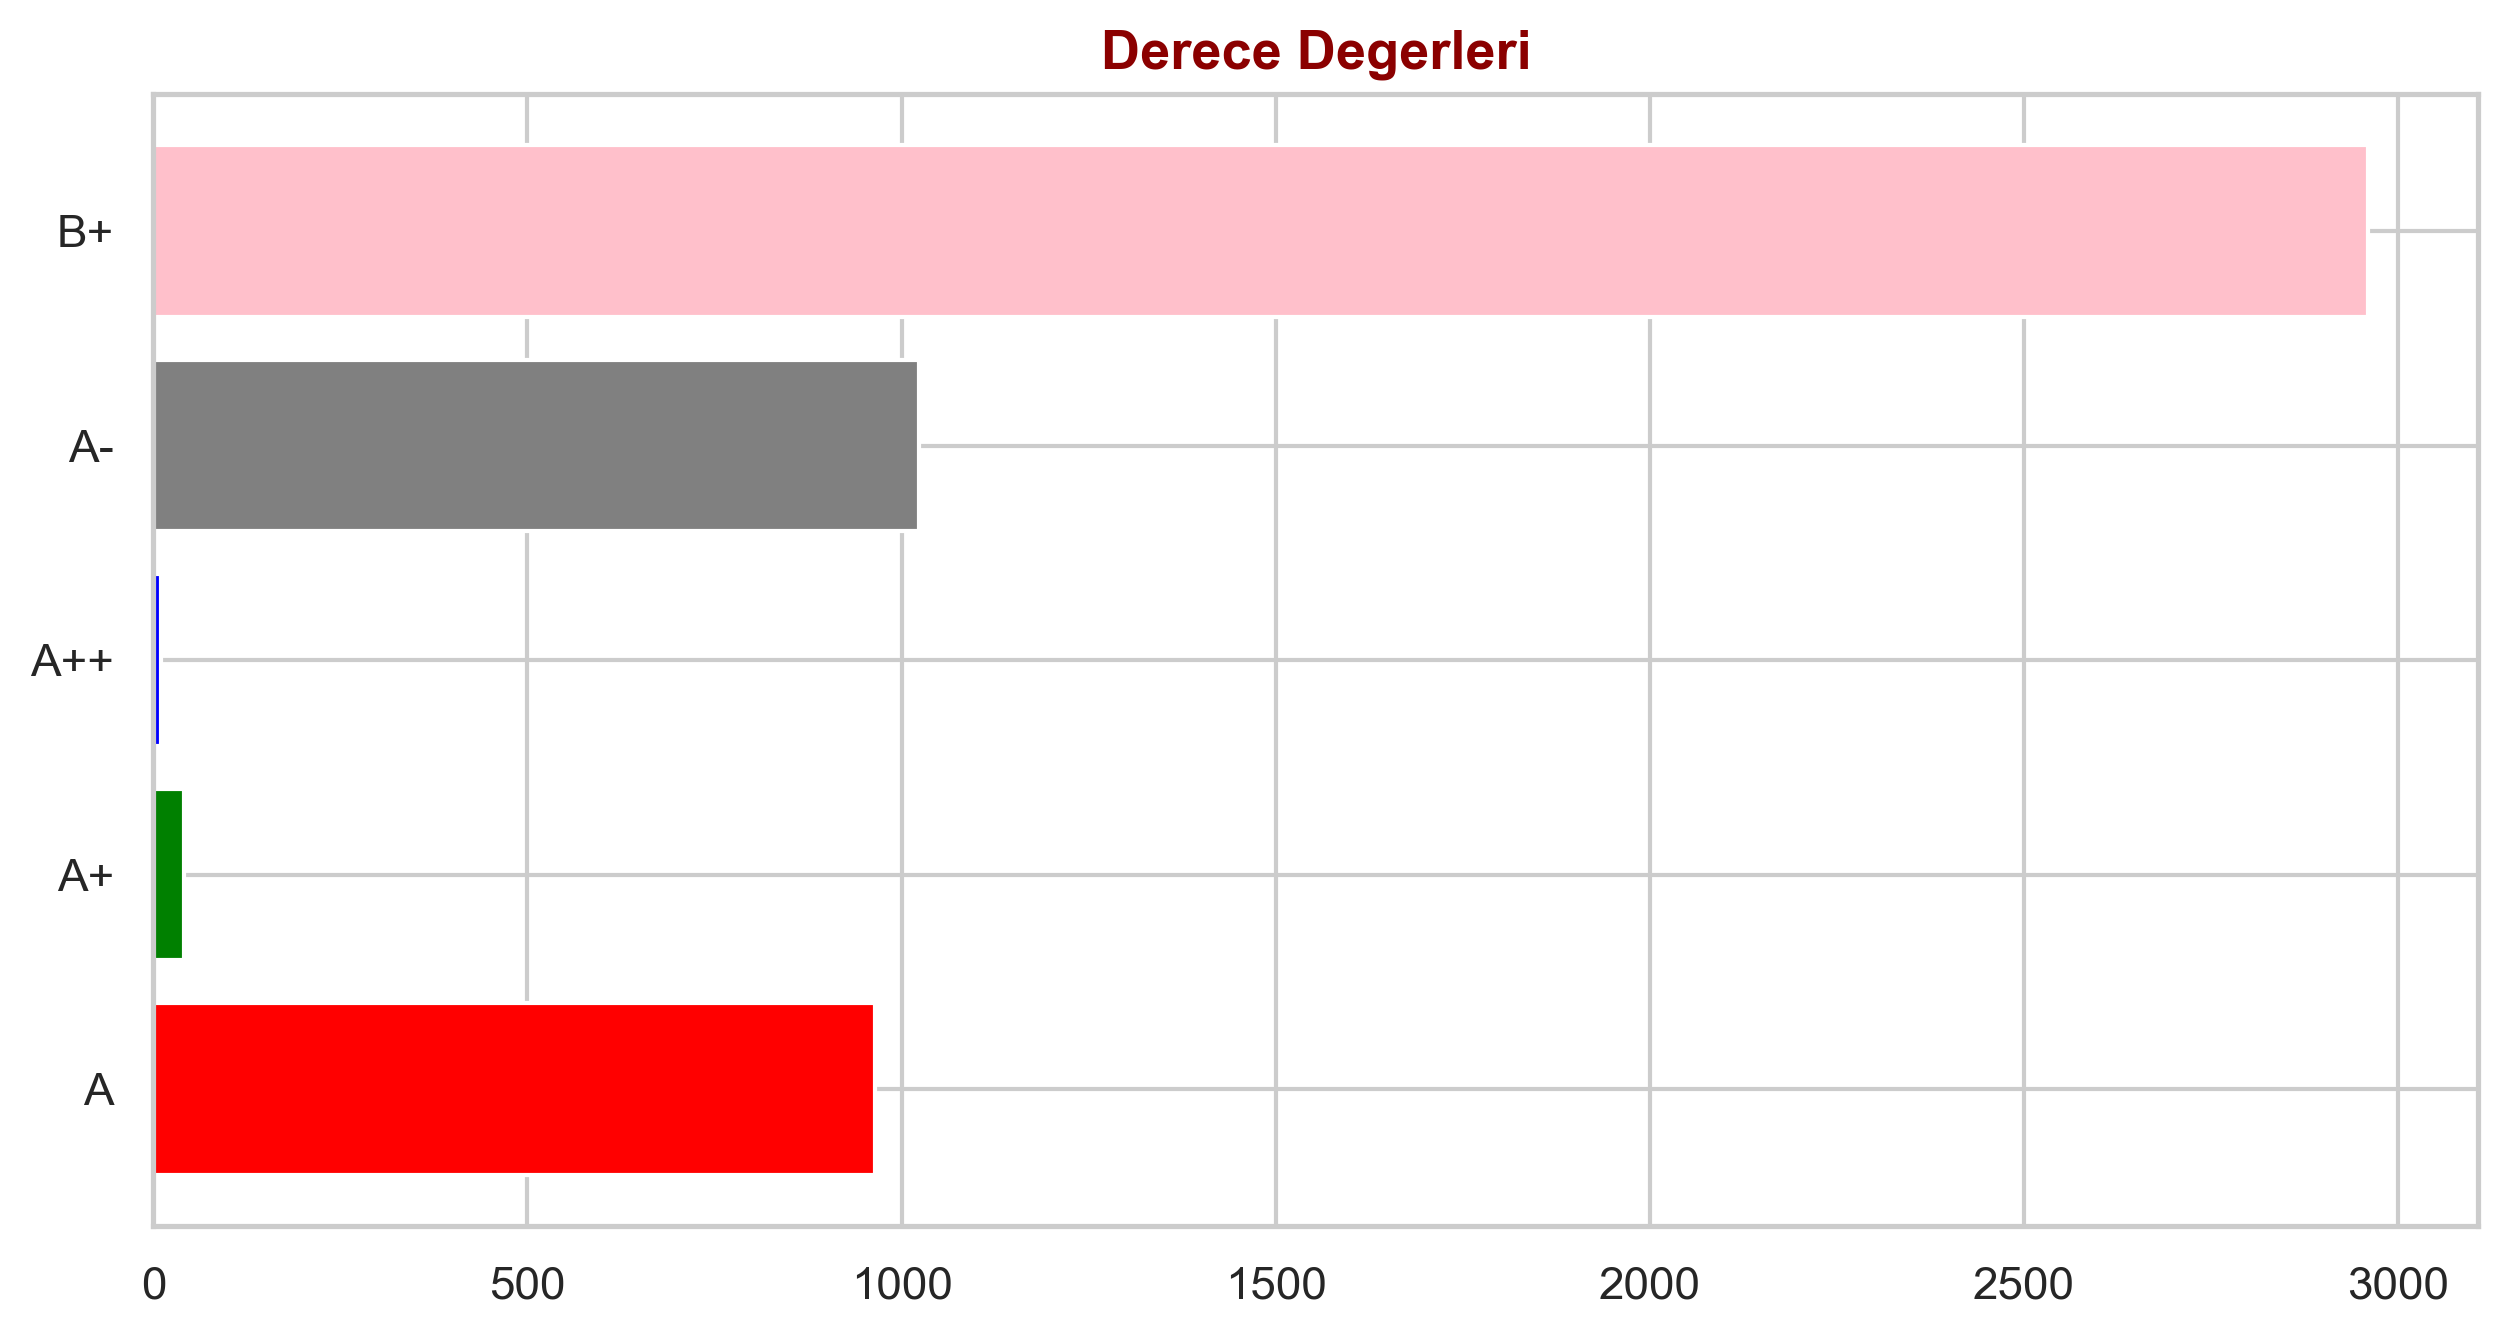

In [8]:
plt.figure(figsize=(10,5) , dpi=300)
plt.barh(youtube.groupby("derece")["derece"].count().index, 
         youtube.groupby("derece")["derece"].count(),
         color=['red','green','blue','grey','pink'])
plt.title("Derece Degerleri", fontdict=baslik_font)
plt.show()

In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


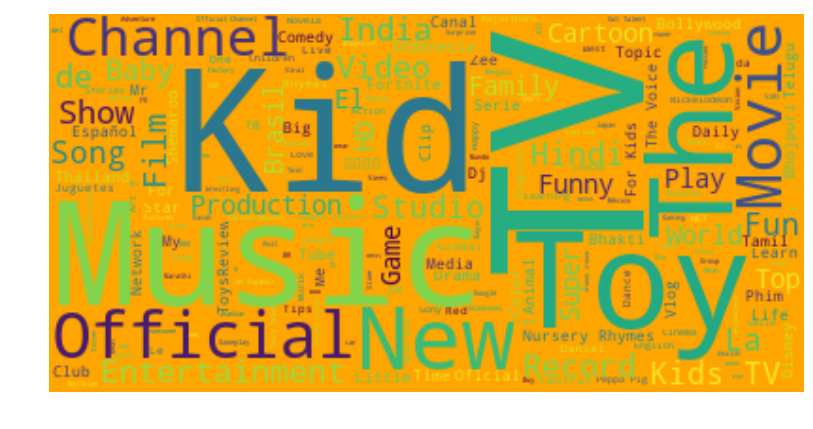

In [9]:
from wordcloud import WordCloud
wordcloud= WordCloud(background_color='orange').generate(" ".join(youtube["kanal_adi"]))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('Off')
plt.show()